In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
path = ".../demand-forecast"
sub = pd.read_csv(path + "/sample_submission.csv")

In [5]:
df_train = pd.read_csv(path + "/train.csv")

In [6]:
df_test = pd.read_csv(path + "/test.csv")

In [7]:
df_train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [8]:
df_test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


### Data preparation

In [9]:
df_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
record_ID          150150 non-null int64
week               150150 non-null object
store_id           150150 non-null int64
sku_id             150150 non-null int64
total_price        150149 non-null float64
base_price         150150 non-null float64
is_featured_sku    150150 non-null int64
is_display_sku     150150 non-null int64
units_sold         150150 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [11]:
df_train['week'] = pd.to_datetime(df_train['week'],format='%d/%m/%y')
df_test['week'] = pd.to_datetime(df_test['week'],format='%d/%m/%y')

In [12]:
df_train = df_train.sort_values('week')
df_test = df_test.sort_values('week')

In [13]:
print(f'Starting training date: {min(df_train["week"])}')
print(f'Latest training date: {max(df_train["week"])}')
print('-'*30)
print(f'Starting testing date: {min(df_test["week"])}')
print(f'Latest testing date: {max(df_test["week"])}')

Starting training date: 2011-01-17 00:00:00
Latest training date: 2013-07-09 00:00:00
------------------------------
Starting testing date: 2013-07-16 00:00:00
Latest testing date: 2013-10-01 00:00:00


In [14]:
print(f"Training size: {df_train.shape}")
print(f"Testing size: {df_test.shape}")

Training size: (150150, 9)
Testing size: (13860, 8)


In [15]:
df_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
774,1097,2011-01-17,9672,223153,192.3750,236.5500,1,1,109
773,1096,2011-01-17,9672,223245,207.3375,207.3375,0,0,61
772,1095,2011-01-17,9672,222765,241.5375,241.5375,0,0,49
771,1094,2011-01-17,9672,222087,181.6875,207.3375,1,0,129


In [16]:
df_train.rename(columns={'week':'date'},inplace=True)
df_test.rename(columns={'week':'date'},inplace=True)

In [17]:
df_train['week'] = list(map(lambda x: str(x).split('-')[-1].split()[0] ,df_train['date']))
df_test['week'] = list(map(lambda x: str(x).split('-')[-1].split()[0] ,df_test['date']))
df_train['month'] = list(map(lambda x: int(str(x).split('-')[1]),df_train['date']))
df_test['month'] = list(map(lambda x: int(str(x).split('-')[1]),df_test['date']))

In [18]:
df_train.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,17,1
774,1097,2011-01-17,9672,223153,192.3750,236.5500,1,1,109,17,1
773,1096,2011-01-17,9672,223245,207.3375,207.3375,0,0,61,17,1
772,1095,2011-01-17,9672,222765,241.5375,241.5375,0,0,49,17,1
771,1094,2011-01-17,9672,222087,181.6875,207.3375,1,0,129,17,1


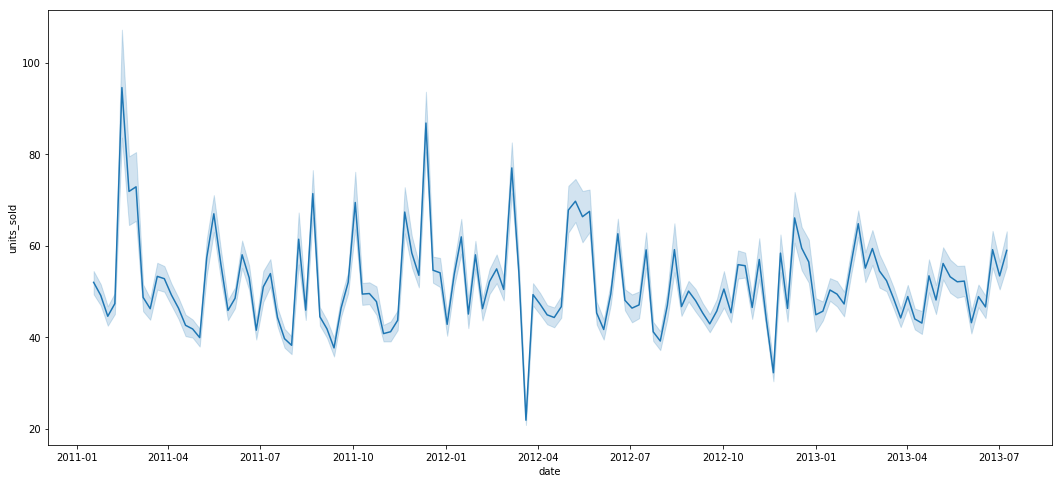

In [19]:
plt.figure(figsize=(18,8))
sns.lineplot(x='date',y='units_sold',data=df_train)

In [20]:
df_train = df_train.round(2)
df_test = df_test.round(2)

In [21]:
df_train['price_diff'] = ((df_train.base_price-df_train.total_price)/df_train.base_price).round(2)
df_test['price_diff'] = ((df_test.base_price-df_test.total_price)/df_test.base_price).round(2)

In [22]:
df_train['price_diff'] = list(map(lambda x: 1 if x>0 else 0,df_train['price_diff']))
df_test['price_diff'] = list(map(lambda x: 1 if x>0 else 0,df_test['price_diff']))

In [23]:
df_train.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1
774,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1
773,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0
772,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0
771,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1


In [24]:
tr = df_train
ts = df_test

In [25]:
tr.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1
774,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1
773,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0
772,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0
771,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1


In [26]:
# tr.to_csv("train1.csv", index=False)
# ts.to_csv("test1.csv",index=False)

In [27]:
tr.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1
774,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1
773,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0
772,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0
771,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1


In [28]:
ts.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,week,month,price_diff
0,212645,2013-07-16,8091,216418,108.30,108.30,0,0,16,7,0
774,213738,2013-07-16,9672,223153,240.11,240.11,0,0,16,7,0
773,213737,2013-07-16,9672,223245,233.70,233.70,0,0,16,7,0
772,213736,2013-07-16,9672,222765,254.36,254.36,0,0,16,7,0
771,213735,2013-07-16,9672,222087,166.01,203.06,1,1,16,7,1


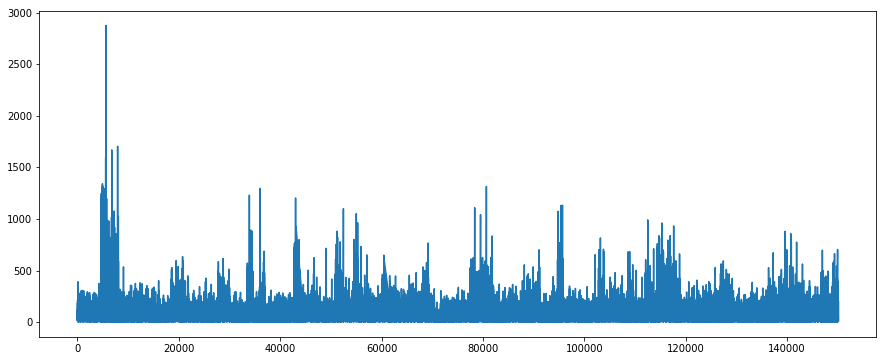

In [29]:
plt.figure(figsize=(15,6))
plt.plot(tr['units_sold'])

In [30]:
tr = tr[tr.units_sold<2000]

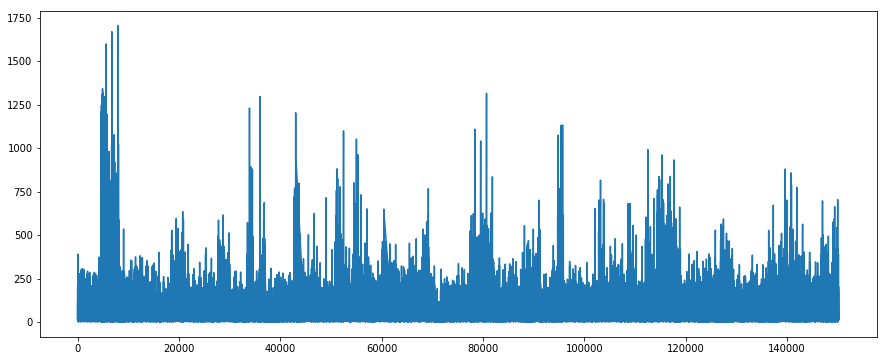

In [31]:
plt.figure(figsize=(15,6))
plt.plot(tr['units_sold'])

In [32]:
tr.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1
774,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1
773,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0
772,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0
771,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1


### Store-Id

In [33]:
t1 = pd.DataFrame(tr.groupby('store_id')['units_sold'].mean())
t1.columns = ['store_mean']
t1.reset_index(inplace=True)

t2 = pd.DataFrame(tr.groupby('store_id')['units_sold'].std())
t2.columns = ['store_std']
t2.reset_index(inplace=True)

In [34]:
t1.head()

,store_id,store_mean
0,8023,108.600000
1,8058,52.747692
2,8063,34.714980
3,8091,32.805983
4,8094,41.821795


In [35]:
t2.head()

,store_id,store_std
0,8023,101.251594
1,8058,48.506107
2,8063,35.161718
3,8091,33.272252
4,8094,43.558398


In [36]:
tr = tr.merge(t1, on='store_id', how='left').merge(t2, on='store_id', how='left')
ts = ts.merge(t1, on='store_id', how='left').merge(t2, on='store_id', how='left')

In [37]:
tr.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff,store_mean,store_std
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1,32.805983,33.272252
1,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1,61.179290,54.561174
2,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0,61.179290,54.561174
3,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0,61.179290,54.561174
4,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1,61.179290,54.561174


### sku_id

In [38]:
t1 = pd.DataFrame(tr.groupby('sku_id')['units_sold'].mean())
t1.columns = ['sku_mean']
t1.reset_index(inplace=True)

t2 = pd.DataFrame(tr.groupby('sku_id')['units_sold'].std())
t2.columns = ['sku_std']
t2.reset_index(inplace=True)

In [39]:
tr = tr.merge(t1, on='sku_id', how='left').merge(t2, on='sku_id', how='left')
ts = ts.merge(t1, on='sku_id', how='left').merge(t2, on='sku_id', how='left')

In [40]:
tr = tr.round(2)
ts = ts.round(2)

### dataframe

In [41]:
tr.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff,store_mean,store_std,sku_mean,sku_std
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1,32.81,33.27,88.92,71.91
1,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1,61.18,54.56,60.41,80.45
2,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0,61.18,54.56,68.51,83.84
3,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0,61.18,54.56,53.36,45.17
4,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1,61.18,54.56,64.23,58.73


In [42]:
ts.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,week,month,price_diff,store_mean,store_std,sku_mean,sku_std
0,212645,2013-07-16,8091,216418,108.30,108.30,0,0,16,7,0,32.81,33.27,88.92,71.91
1,213738,2013-07-16,9672,223153,240.11,240.11,0,0,16,7,0,61.18,54.56,60.41,80.45
2,213737,2013-07-16,9672,223245,233.70,233.70,0,0,16,7,0,61.18,54.56,68.51,83.84
3,213736,2013-07-16,9672,222765,254.36,254.36,0,0,16,7,0,61.18,54.56,53.36,45.17
4,213735,2013-07-16,9672,222087,166.01,203.06,1,1,16,7,1,61.18,54.56,64.23,58.73


In [43]:
tr['week'] = tr['week'].astype('int')
ts['week'] = ts['week'].astype('int')

### model selection

In [63]:
X = tr.drop(['record_ID','date','units_sold'],axis=1)
Y = tr['units_sold']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

### Xgboost

In [47]:
import xgboost as xgb

In [48]:
reg = xgb.XGBRegressor(max_depth=5, n_estimators=150)

In [49]:
reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [50]:
reg.fit(x_train,y_train, eval_set = [(x_train, y_train), (x_test, y_test)])

[01:06:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:72.9624	validation_1-rmse:72.3735
[1]	validation_0-rmse:67.764	validation_1-rmse:67.2235
[2]	validation_0-rmse:63.1852	validation_1-rmse:62.7141
[3]	validation_0-rmse:59.1738	validation_1-rmse:58.7755
[4]	validation_0-rmse:55.664	validation_1-rmse:55.3404
[5]	validation_0-rmse:52.3638	validation_1-rmse:52.0942
[6]	validation_0-rmse:49.483	validation_1-rmse:49.305
[7]	validation_0-rmse:46.9152	validation_1-rmse:46.8128
[8]	validation_0-rmse:44.6051	validation_1-rmse:44.5961
[9]	validation_0-rmse:42.6446	validation_1-rmse:42.7108
[10]	validation_0-rmse:40.8666	validation_1-rmse:41.0516
[11]	validation_0-rmse:39.3596	validation_1-rmse:39.6208
[12]	validation_0-rmse:38.0056	validation_1-rmse:38.3867
[13]	validation_0-rmse:36.8938	validation_1-rmse:37.3396
[14]	validation_0-rmse:35.9096	validation_1-rmse:36.

[141]	validation_0-rmse:24.0314	validation_1-rmse:25.7748
[142]	validation_0-rmse:24.0068	validation_1-rmse:25.7517
[143]	validation_0-rmse:23.9923	validation_1-rmse:25.7437
[144]	validation_0-rmse:23.9464	validation_1-rmse:25.7003
[145]	validation_0-rmse:23.9181	validation_1-rmse:25.6855
[146]	validation_0-rmse:23.8897	validation_1-rmse:25.6608
[147]	validation_0-rmse:23.8809	validation_1-rmse:25.6504
[148]	validation_0-rmse:23.8716	validation_1-rmse:25.6438
[149]	validation_0-rmse:23.8644	validation_1-rmse:25.638


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
eval_result = reg.evals_result()

In [52]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

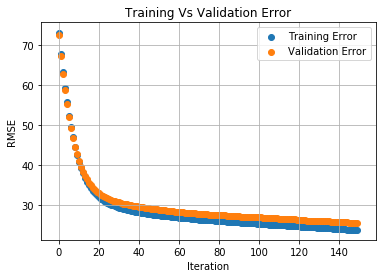

In [53]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

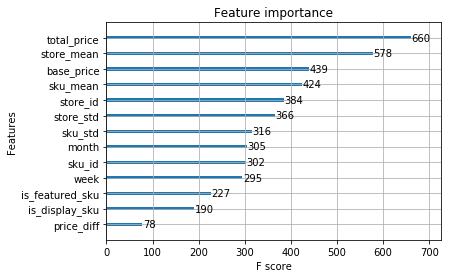

In [54]:
xgb.plot_importance(reg)
plt.show()

In [55]:
result = reg.predict(x_test)

In [56]:
result

array([ 14.632829, 114.262146,  28.48503 , ...,  18.058767,  52.268364,
        72.209885], dtype=float32)

In [57]:
r2_score(y_test,result)

0.8128877260911368

In [58]:
prediction = reg.predict(ts.drop(['record_ID','date'],axis=1))

In [59]:
prediction

array([34.712532, 22.670822, 35.860786, ..., 20.325985, 24.225021,
       12.335599], dtype=float32)

In [60]:
ts['units_sold'] = prediction

In [61]:
ts['units_sold'] = list(map(lambda x: 0 if x<0 else x,ts['units_sold']))

In [ ]:
sub

In [ ]:
#ts[['record_ID','units_sold']]

In [ ]:
ts[['record_ID','units_sold']].to_csv('xgb_model1.csv',index=False)

### knn

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
knn = KNeighborsRegressor(4)

In [97]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [98]:
knn_pred = knn.predict(x_test)

In [99]:
r2_score(y_test,knn_pred)

0.6654130233140734

In [100]:
tr.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week,month,price_diff,store_mean,store_std,sku_mean,sku_std
0,1,2011-01-17,8091,216418,99.04,111.86,0,0,20,17,1,1,32.81,33.27,88.92,71.91
1,1097,2011-01-17,9672,223153,192.38,236.55,1,1,109,17,1,1,61.18,54.56,60.41,80.45
2,1096,2011-01-17,9672,223245,207.34,207.34,0,0,61,17,1,0,61.18,54.56,68.51,83.84
3,1095,2011-01-17,9672,222765,241.54,241.54,0,0,49,17,1,0,61.18,54.56,53.36,45.17
4,1094,2011-01-17,9672,222087,181.69,207.34,1,0,129,17,1,1,61.18,54.56,64.23,58.73
